# Classification model using Logistic Regression

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload RNA data

In [2]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_16_genes_6_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,BAP1,EPAS1,NF2,PTEN,TSC1,VHL,Y
0,0,33.677294,37.95811,33.96080,36.73944,32.93402,32.30615,1
1,1,32.643149,38.83281,33.69899,37.13114,33.16630,32.19988,1
2,2,32.368866,37.19345,34.07472,37.91878,33.63282,31.49147,1
3,3,31.895400,39.46713,33.14612,37.77827,32.88250,32.11538,0
4,4,33.968348,38.49884,32.58079,37.99008,33.44515,33.33646,1


In [3]:
X = data.iloc[:,1:7  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

          BAP1     EPAS1       NF2      PTEN      TSC1       VHL
0    33.677294  37.95811  33.96080  36.73944  32.93402  32.30615
1    32.643149  38.83281  33.69899  37.13114  33.16630  32.19988
2    32.368866  37.19345  34.07472  37.91878  33.63282  31.49147
3    31.895400  39.46713  33.14612  37.77827  32.88250  32.11538
4    33.968348  38.49884  32.58079  37.99008  33.44515  33.33646
..         ...       ...       ...       ...       ...       ...
176  33.843872  39.13826  33.58214  37.99666  32.93248  31.79913
177  32.519967  35.86338  33.10420  34.65038  32.62658  31.66344
178  33.115209  37.91340  33.80118  36.77314  32.81059  32.39461
179  32.895151  37.96870  33.51366  36.08937  34.04810  32.34561
180  33.404526  38.75226  33.67890  36.87734  33.82576  30.34566

[181 rows x 6 columns]
Numero de pacientes:  181


### 3. Train-Test dataset split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_test))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'C': [1,2,5,7,10],
            'solver': ['newton-cg','liblinear'], 
            'max_iter':[25,50,100,200,500,1000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10],
                         'max_iter': [25, 50, 100, 200, 500, 1000],
                         'random_state': [125],
                         'solver': ['newton-cg', 'liblinear']})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=1, max_iter=25, random_state=125, solver='liblinear')

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.527832512315271


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [10]:
print('Final accuracy on the training dataset: ' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset: 0.5902777777777778
Final accuracy on the testing dataset: 0.5675675675675675


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[30 38]
 [21 55]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1
 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1]


In [12]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.59      0.44      0.50        68
           1       0.59      0.72      0.65        76

    accuracy                           0.59       144
   macro avg       0.59      0.58      0.58       144
weighted avg       0.59      0.59      0.58       144



In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 5 12]
 [ 4 16]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [14]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.56      0.29      0.38        17
           1       0.57      0.80      0.67        20

    accuracy                           0.57        37
   macro avg       0.56      0.55      0.53        37
weighted avg       0.56      0.57      0.54        37



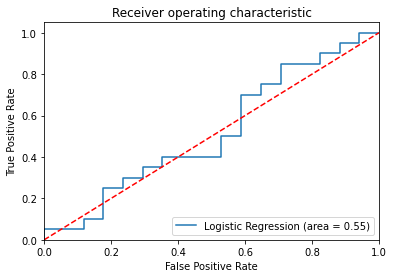

In [15]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()